In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact
import pandas as pd
from numpy import cos,sin,pi
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

plt.rcParams["figure.figsize"] = [9.6, 7.2]

In [2]:
%%HTML
<style>
td {
  font-size: 20px
}
</style>

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


## Announcements

  - Quiz 1 in recitation this week. 
    - Distance formula
    - Dot product and its properties
    - projection
  - Homework 2 posted, due 9/17
  - R07: Moved!
    - Thurs 2:40pm–3:30pm
  - CA Help Room (Mudd 214) starts tonight! 
    - Thur 7–9pm
    - Sun 3–5pm
    - Mon 7–9pm
    

# One-minute Review

## Vector Operations

Let $\vec v, \vec w$ be vectors in $\RR^n$ and $c$ a scalar. 

| Operation | Notation | Formula | Output |
|---|---| --- |---|
| scalar multiplication | $$c \vec v$$ | $$\langle c v_1, \ldots ,c v_n \rangle $$| vector |
| vector addition | $$\vec v + \vec w$$ | $$\langle v_1 + w_1,\ldots, v_n + w_n \rangle $$| vector |
| dot product | $$\vec v \cdot \vec w$$ | $$v_1 w_1 + \cdots + v_n w_n  $$| scalar |
| cross product | $$\vec v \times \vec w$$ | $$ \begin{vmatrix} \vec i & \vec j & \vec k \\v_1 & v_2 & v_3 \\ w_1 & w_2 & w_3 \\ \end{vmatrix} $$| 3-vector |

## Properties of $\vec v \times \vec w$

  - $\vec v \times \vec w$ is perpendicular to *both* $\vec v $ and $\vec w$.

  - $\vec v \times \vec w$ points in the direction according to the right-hand-rule.

  - $|\vec v \times \vec w| = |\vec v ||\vec w|\sin\theta$ where theta is the (positive) angle between the vectors.

## Volumes

The volume of a parallelopiped defined by vectors $\vec u$, $\vec v$, and $vec w$ as 3 sides is given by $$V = |\vec u\cdot(\vec v \times \vec w)|.$$ The inner expression is called the **triple product** of the three vectors.

In [6]:
@interact
def _(angle=(0,90,6)):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    uvw = np.array([[1,1.5,1],[2,.2,-1],[1,-1,1]])
    u,v,w = uvw
    ax.quiver([0,0,0],[0,0,0],[0,0,0],uvw[:,0],uvw[:,1],uvw[:,2])
    ppd = np.column_stack([u,u+v,u+v+w,v+w,w,w+u,u+v+w])
    ax.plot(ppd[0],ppd[1],ppd[2],color='k',ls='dashed')
    ppd = np.column_stack([u+v,v,v+w])
    ax.plot(ppd[0],ppd[1],ppd[2],color='k',ls='dashed')
    ppd = np.column_stack([u,u+w])
    ax.plot(ppd[0],ppd[1],ppd[2],color='k',ls='dashed')
    ax.set_autoscale_on(True)
    ax.view_init(30,angle)
    ax.set_xlim([-1,3])
    ax.set_ylim([-2,2])
    ax.set_zlim([-2,2]);

interactive(children=(IntSlider(value=42, description='angle', max=90, step=6), Output()), _dom_classes=('widg…


## Parametric form of lines

The parametric form for a line through a position $\vec p$ with direction vector $\vec v$ it geven by $$\vec r(t) = \vec p + t \vec v.$$


In [7]:
@interact
def _(t=(-2.,5.,.1),angle=(-30,120,6)):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.quiver([0,1],[0,1],[0,1],[1,2*t],[1,0],[1,-t*2])
    ax.plot([1+2*(-1),1+2*(5)],[1,1],[1-2*(-1),1-2*5],color='k',ls='dashed')
    ax.set_xlim([-1,5])
    ax.set_ylim([-2,4])
    ax.set_zlim([-2,4]);
    ax.view_init(30, angle)
    ax.quiver([0,1],[0,1],[0,1],[1,2*t],[1,0],[1,-t*2])
    ax.set_autoscale_on(True)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-6,6]);
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)

interactive(children=(FloatSlider(value=1.5, description='t', max=5.0, min=-2.0), IntSlider(value=42, descript…

# Planes

By analogy, we could parametrize planes in a similar way, but need 2 parameters.

$$\vec r(s,t) = \vec p + t\vec v + s \vec w$$

In [8]:
@interact
def _(angle=(-30,120,6)):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    s = t = np.linspace(-2,2,30)
    s,t = np.meshgrid(s,t)

    x = 3 - 2*t + 3*s
    y = 0 + 1*t + 1*s
    z = 1 + 2*t - 1*s

    ax.plot_surface(x,y,z,alpha=.3)
    r,v,w = np.column_stack([[0,0,0],[3,0,1],[3,0,1],[3,0,1],[-2,1,2],[3,1,-1]])
    ax.quiver(r[:3],v[:3],w[:3],r[3:],v[3:],w[3:],color=['r','b','b']);
    ax.view_init(30, angle)
    ax.set_autoscale_on(True)
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-6,6]);
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)

interactive(children=(IntSlider(value=42, description='angle', max=120, min=-30, step=6), Output()), _dom_clas…

## Equation of a plane

But a more efficient way in $\RR^3$ recognizes that a plane can be define by 
  - a position vector $\vec p = \langle p_1,p_2,p_3 \rangle$, and
  - a **normal** vectorn $\vec n = \langle a,b,c \rangle$, perpendicular to the plane.
  
So a position vector $\vec x = \langle x,y,z \rangle$ if and only if $$\vec n\cdot(\vec x - \vec p) = 0 $$

In [11]:
@interact
def _(angle=(0,90,3)):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    s = t = np.linspace(-2,2,30)
    s,t = np.meshgrid(s,t)

    n = -np.cross([-2,1,2],[3,1,-1])

    x = 3 - 2*t + 3*s
    y = 0 + 1*t + 1*s
    z = 1 + 2*t - 1*s

    ax.plot_surface(x,y,z,alpha=.3)
    r,v,w = np.column_stack([[0,0,0],[3,0,1],[3,0,1],n])
    ax.quiver(r[:2],v[:2],w[:2],r[2:],v[2:],w[2:],color=['r','k']);
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-6,6]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    ax.view_init(30, angle)


interactive(children=(IntSlider(value=45, description='angle', max=90, step=3), Output()), _dom_classes=('widg…

## Equation of a plane

In coordinates, this becomes $$a(x-p_1) + b (y-p_2) + c (z-p_3) = 0$$ or, alternatively, $$ax+by+cz = d$$ where $d=\vec n \cdot\vec p$.


#### Quick exercise

What is a normal vector to the plane given by $$ x+2y = 16-8z?$$
Find a point on this plane. 

### Exercises

  1. Find an equation of the plane through $(1,0,0)$, $(0,1,0)$, and $(0,0,1)$.
  2. Find a parametric form for the line of intersection of the planes given by $x+y-z = 2$ and $2x - y + 3z = 1$.

# Distance between points, lines, and planes

The distance between points is given easily by the distance formula, but often one wants to know the distance from a position to a given set of points, or between two sets. First, we must specify by "distance to a set" we mean **the minimum of the distances to all points is the set**.

#### Example

Find the distance from the origin to the line given by 
$$\vec r(t) = (3-t)\,\vec i + 2t\,\vec j + (t - 2)\,\vec k.$$

In [12]:
p,v = np.array([[3,0,-2],[-1,2,1]])
pj = np.dot(p,v)/np.dot(v,v)*v
@interact
def _(t=(-2.,5.,.1),angle=(0,90,3),sol=False):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.quiver([0,0],[0,0],[0,0],[3,3-1*t],[0,2*t],[-2,-2+t])
    ax.plot([5,-2],[-4,10],[-4,3],color='k',ls='dashed')
    ax.view_init(30, angle)
    ax.set_xlim([-1,5])
    ax.set_ylim([-2,4])
    ax.set_zlim([-2,4]);
    if sol:
        vx,vy,vz = np.column_stack([[0,0,0],pj,pj,p-pj])
        ax.quiver(vx[:2],vy[:2],vz[:2],vx[2:],vy[2:],vz[2:],color='r')
    for c in 'xyz':
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)

interactive(children=(FloatSlider(value=1.5, description='t', max=5.0, min=-2.0), IntSlider(value=45, descript…

### Distance from a point to a line

We can generalize this:
The distance from a point at position $\vec x$ to a line with parametric form $\vec r (t) = \vec p + t\,\vec v$ is given by $$|\vec x - \vec p - \operatorname{proj}_\vec v (\vec x - \vec p) |.$$

### Distance from a point to a plane

The distance from a point at position $\vec x$ to a plane with normal vector $\vec n$ and a point at $\vec p$ is given by $$\textit{Exercise.}$$

## Quadric Surfaces

Planes arise from (affine) linear equations, i.e. the variables appear with degree 1. We proceed slowly and explore what happens when we up that to 2. 

#### Definition

A **quadric surface** in $\RR^3$ is the solution set to an equation of the form $$ax^2+by^2+cz^2 + dx+ey+fz+g = 0$$ where at least one of $a,b,c$ is nonzero.

A **trace** of a surface is the curve in the plane obtained by fixing one variable. A group of traces graphed together makes a **contour plot**. 

#### Example

$$x^2 +2y^2- z^2 = 1$$

In [41]:
@interact
def _(trace=['x','y','z'],angle=(-30,120,6)):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    t = np.linspace(0,2*np.pi,50)
    z = np.linspace(-2,2,41)
    t,z = np.meshgrid(t,z)
    X = np.sqrt(z**2 + 1)*np.cos(t)
    Y = np.sqrt(z**2 + 1)*np.sin(t)/np.sqrt(2)
    Z = z
    ax.view_init(30, angle)
    ax.contour(X,Y,Z,zdir=trace,offset=-2)
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-2,2]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    ax.plot_surface(X,Y,Z,cmap='viridis',alpha=.5);

interactive(children=(Dropdown(description='trace', options=('x', 'y', 'z'), value='x'), IntSlider(value=42, d…

### Expectations

  - Given a quadratic equation in three variables, you should be able to sketch a contour plot in at least one of the variables. 
  - Given a contour plot, you should have an idea of what the 3-D plot looks like (e.g., match it with the right plot among a group).
  - You **do not** need to memorize the names of various classes of quadric surfaces. 

### Exercises

  1. Sketch a contour plot for each quadric surface below. 
    1. $$ x^2 + \frac{y^2}{4} + 2z^2 = 1$$
    2. $$ x^2 - \frac{y^2}{4} + 2z^2 = -1$$
    3. $$ x^2 + \frac{y^2}{4} + 2z = 1$$
  3. Match each to its appropriate graph below.

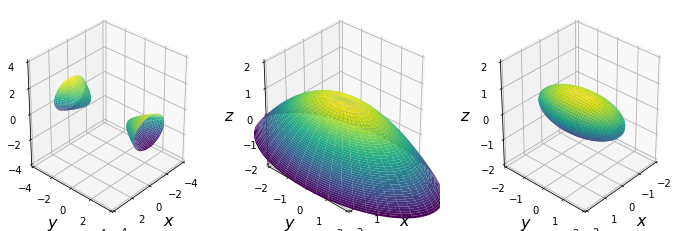

In [80]:
fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(131,projection='3d')
t = np.linspace(0,2*np.pi,50)
y = np.linspace(-4,-2,21)
y = np.concatenate([y,-np.flip(y)])
t,y = np.meshgrid(t,y)
X = np.sqrt(y**2/4-1)*np.cos(t)
Z = np.sqrt(y**2/4-1)*np.sin(t)/np.sqrt(2)
Y = y
ax.view_init(30, 42)
ax.set_autoscale_on(True)
for c in 'xyz':
    getattr(ax,f"set_{c}lim")([-4,4]);    
    getattr(ax,f"set_{c}label")(f"${c}$",size=16)
ax.plot_surface(X,Y,Z,cmap='viridis',alpha=1);
ax = fig.add_subplot(132,projection='3d')
t = np.linspace(0,2*np.pi,50)
y = np.linspace(-2,1/2,41)
t,y = np.meshgrid(t,y)
X = np.sqrt(1-2*y)*np.cos(t)
Y = np.sqrt(1-2*y)*np.sin(t)*2
Z = y
ax.view_init(30, 42)
ax.set_autoscale_on(True)
for c in 'xyz':
    getattr(ax,f"set_{c}lim")([-2,2]);    
    getattr(ax,f"set_{c}label")(f"${c}$",size=16)
ax.plot_surface(X,Y,Z,cmap='viridis',alpha=1);
ax = fig.add_subplot(133,projection='3d')
t = np.linspace(0,2*np.pi,50)
y = np.linspace(-2,2,41)
t,y = np.meshgrid(t,y)
X = np.sqrt(1-y**2/4)*np.cos(t)
Z = np.sqrt(1-y**2/4)*np.sin(t)/np.sqrt(2)
Y = y
ax.view_init(30, 42)
ax.set_autoscale_on(True)
for c in 'xyz':
    getattr(ax,f"set_{c}lim")([-2,2]);    
    getattr(ax,f"set_{c}label")(f"${c}$",size=16)
ax.plot_surface(X,Y,Z,cmap='viridis',alpha=1);